In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/vazgenosipov/Desktop/Python/Python Data analys/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv")


In [3]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


## Feature engineering

In [4]:
X = df.drop('sales',axis = 1)

In [5]:
y = df["sales"]

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# create an instance 

polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
# this polynomical converter 
# is expected to be fit onto the dataset

polynomial_converter.fit(X)

# what it basically does is says
# here is x data we want you to transform

PolynomialFeatures(include_bias=False)

In [9]:
# to transfrom the dataset 
# to second degree polynomial

poly_features = polynomial_converter.transform(X)

In [10]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [11]:
poly_features[0]

# x1 x2 x3 x1*x2 x1*x3 x2*x3 x1**2 x2**2 x3**2
# the 3 originals 
# the 3 possible interactions 
# the 3 squared terms 

# note that the order may be different

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [12]:
# may do both steps in one line of code

polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

## Train test / Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    
# create a putle unpaking of train data base and test data base    

In [15]:
from sklearn.linear_model import LinearRegression

# import regression

In [16]:
# create an instance of regresison 

model = LinearRegression()

In [17]:
# insert a part of the data set you need to train 

model.fit(X_train, y_train)

LinearRegression()

In [18]:
# take the remaining test section of the model 
# insert it into your model 

test_predictions = model.predict(X_test)

In [19]:
# chek the predicted Y values from x_test with y_test values

from  sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
MAE = mean_absolute_error(y_test, test_predictions)

In [21]:
MSE = mean_squared_error(y_test, test_predictions)

In [22]:
RMSE = np.sqrt(MSE)

In [23]:
MAE

0.4896798044803488

In [24]:
RMSE

0.6646431757268974

In [25]:
# as you may see polynomial regression 
# is performing better that a normal regresison 
# jugdging by root mean squared error

# it is important to comapre the models
# with the same sample size and random division 
# both have 30% data for testing and 70 for training 
# both were randomly seperated usinf a seed of 101

In [26]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [27]:
# new polynomical features, exstend the listed above fiatures (a*b + a**2 + b**2) and so on

poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

# Bias Variance trade-off


In [28]:
# overfitting - the model is to complex and not general enough for new data
# only calculates good at train data (basically you make the model to calculate the train data)

# underfitting - the model is to simple and can not perform good on both train and test data 
# ussually when you have not enough data

In [29]:
# on the training set when we increase the model complexity - the model error decreases
# will start to capture a lot of noice in the data

# dont forget the test set, at some point increasing polynomials will decrease the test set performance

# Choosing order of polynomial

In [30]:
# we need too understand the error for both train and test sets
# to avoid overfitting and underfitting

# to create a loop for these

In [31]:
# 1 step: CREATE A DIFFERENT ORDER POLYNOMIAL

# 2 step: CREATE A TRAIN/TEST SETS ON POLYNOMIAL FEATURES

# 3 step FIT ON TRAIN DATA

# 4 step: STORE/SAVE THE RMSE FOR BOTH TRAIN/TEST SETS

# 5 step: PLOT THE RESULTS

In [35]:
# create two empty lists

train_rmse_errors = []
test_rmse_errors = []

# creating a loop
for degrees in range(1,10):
    
    # create a polynomial converter
    poly_converter = PolynomialFeatures(degree=degrees, include_bias=False)
    
    # fit and transofrm the data
    poly_features = poly_converter.fit_transform(X)
    
    # split in test and train
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # create a model
    model = LinearRegression()
    
    # fit the data to the model
    model.fit(X_train, y_train)
    
    # test the predictions on train data
    train_predict = model.predict(X_train)
    
    # test the predictions on test data
    test_predict = model.predict(X_test)
    
    
    # estimate the error for each
    train_error = np.sqrt(mean_squared_error(y_train, train_predict))
    test_error = np.sqrt(mean_squared_error(y_test, test_predict))
    
    
    # append the result to the list above
    train_rmse_errors.append(train_error)
    test_rmse_errors.append(test_error)
    
    

In [39]:
# check the lists

print ("train_rmse_errors: ", train_rmse_errors)
print ("\n")
print ("test_rmse_errors: ", test_rmse_errors)


train_rmse_errors:  [1.7345941243293763, 0.587957408529223, 0.43393443569020673, 0.35170836883993534, 0.2509342963168562, 0.20133513038009845, 5.429519690630219, 0.20829323347473921, 0.17705794329531716]


test_rmse_errors:  [1.5161519375993884, 0.6646431757268974, 0.5803286825163759, 0.5077742631180222, 2.575820709711998, 4.417531343659344, 1368.3537494947786, 4031.580690396981, 99797.38688330933]


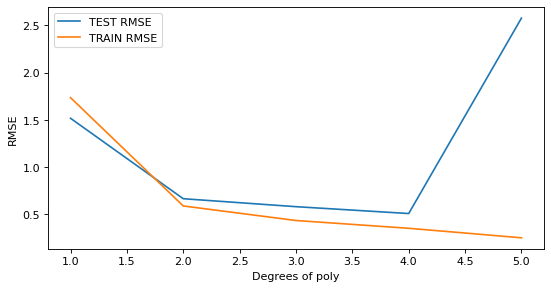

In [63]:
# lets visualise it 

plt.figure(figsize=(8,4), dpi = 80)
plt.plot(range(1,6), test_rmse_errors[:5], label = "TEST RMSE")
plt.plot(range(1,6), train_rmse_errors[:5], label = "TRAIN RMSE")
plt.xlabel("Degrees of poly")
plt.ylabel("RMSE")
plt.legend();


# Model deployment

In [64]:
# create a finalized polynomial converter 

final_poly_conv = PolynomialFeatures(degree=3, include_bias=False)

In [66]:
final_model = LinearRegression()

In [69]:
# transform and fit the polynomial features that you need

converted_data_X = final_poly_conv.fit_transform(X)

In [70]:
# fir your model on top of them


final_model.fit(converted_data_X, y)

LinearRegression()

In [75]:
# SAVE THE MODEL and POLYNOMIAL CONVERTER on your computer


# import nesessary libriaries
from joblib import dump, load

In [73]:
# save the models

dump(final_model, 'Final_poly_model.joblib')

['Final_poly_model.joblib']

In [74]:
dump(final_poly_conv, "final_poly_converter.joblib")

['final_poly_converter.joblib']

In [77]:
# to LOAD the model for further use 


loaded_converter_poly = load("final_poly_converter.joblib")
loaded_model_poly = load("Final_poly_model.joblib")

## Example 

In [78]:
# example to run the new imported models

# imagine new data that we want to spent on campaigns 

campaign = [[149,22,12]]

In [80]:
new_data_ex = loaded_converter_poly.fit_transform(campaign)

In [81]:
loaded_model_poly.fit(new_data_ex,)

TypeError: fit() missing 1 required positional argument: 'y'